In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
data_dir = r"C:\Users\saipr\Downloads\archive (13)\brain_tumor_dataset"



datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,         # Random rotation
    width_shift_range=0.2,     # Random width shift
    height_shift_range=0.2,    # Random height shift
    shear_range=0.2,           # Shear
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill mode for new pixels
)


# Load the training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='training'
)

# Load the validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [14]:
from tensorflow.keras import layers, models

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.5154 - loss: 1.8216 - val_accuracy: 0.5600 - val_loss: 0.6929
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.6181 - loss: 0.6652 - val_accuracy: 0.6200 - val_loss: 0.6250
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.6169 - loss: 0.6549 - val_accuracy: 0.6200 - val_loss: 0.6035
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.6406 - loss: 0.6296 - val_accuracy: 0.6800 - val_loss: 0.5796
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.6391 - loss: 0.6473 - val_accuracy: 0.6600 - val_loss: 0.5634
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.6443 - loss: 0.6819 - val_accuracy: 0.7000 - val_loss: 0.5685
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.6898 - loss: 0.5909 - val_accuracy: 0.7400 - val_loss: 0.5408
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.7705 - loss: 0.5841 - val_accuracy: 0.7200 - val_loss:

In [41]:
# Get true labels
true_classes = val_data.classes


In [42]:
y_pred=model.predict(val_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


In [45]:
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes


In [48]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(true_classes,y_pred)

array([[ 8, 11],
       [11, 20]], dtype=int64)

In [51]:

print(classification_report(true_classes,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42        19
           1       0.65      0.65      0.65        31

    accuracy                           0.56        50
   macro avg       0.53      0.53      0.53        50
weighted avg       0.56      0.56      0.56        50



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The image is classified as: does not have a brain tumor with a probability of 0.4596


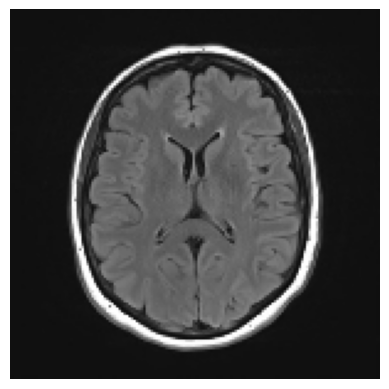

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a new image
img_path = "C:\\Users\\saipr\\Downloads\\archive (13)\\no\\no 97.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)

# Get the probability and class
probability = prediction[0][0]  # This gives you the probability for class 1
predicted_class = "has a brain tumor" if probability > 0.5 else "does not have a brain tumor"

# Print the results
print(f"The image is classified as: {predicted_class} with a probability of {probability:.4f}")


# Display the image
plt.imshow(img_array[0])  # img_array[0] since img_array has an extra dimension
plt.axis('off')  # Hide axis
plt.show()

